In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.robust.norms import HuberT
from skbio.stats.composition import ilr,clr,alr
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
import seaborn as sns
from scipy.stats import skew
pd.set_option('display.max_columns', None)

In [11]:
X = family_income_data.loc[:, expenditures]
y = family_income_data['Total Household Income']

In [12]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression, Lasso
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.preprocessing import Normalizer, PolynomialFeatures, MinMaxScaler, StandardScaler
from sklearn.svm import SVR
from sklearn.decomposition import IncrementalPCA, SparsePCA, KernelPCA
from sklearn.manifold import TSNE
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, precision_score,recall_score, classification_report, confusion_matrix

In [13]:
# Thay thế các giá trị bằng 0 bằng một epsilon nhỏ
epsilon = 1e-9
compositional_data = X.replace(0, epsilon)

# Chuyển đổi dữ liệu thành phần bằng centered log-ratio (CLR)
clr_compositional_data = ilr(compositional_data)

# Chuyển dữ liệu CLR về dạng DataFrame để tiện sử dụng
clr_compositional_data = pd.DataFrame(clr_compositional_data)
X_train, X_test, y_train, y_test = train_test_split(clr_compositional_data, y, test_size=0.2, random_state=41)
""" rfr = RandomForestRegressor(verbose=True, n_jobs=-1, n_estimators=1000)
rfr.fit(X_train, y_train) """
# Huấn luyện mô hình hồi quy tuyến tính với kiểm tra chéo
model = LinearRegression()
cv_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
model.fit(X_train, y_train)


LinearRegression()

In [14]:
# Dự đoán cho tập kiểm tra
pred = model.predict(X_test)

#rfr.score(X_test, y_test)
print("Mean CV RMSE:", np.sqrt(-cv_scores).mean())
# Tính RMSE
rmse = np.sqrt(mean_squared_error(y_test, pred))
print("RMSE:", rmse)

Mean CV RMSE: 250417.86198032997
RMSE: 215975.71619512


Kích thước của mảng: (8309,)
Kích thước của mảng: (8309,)


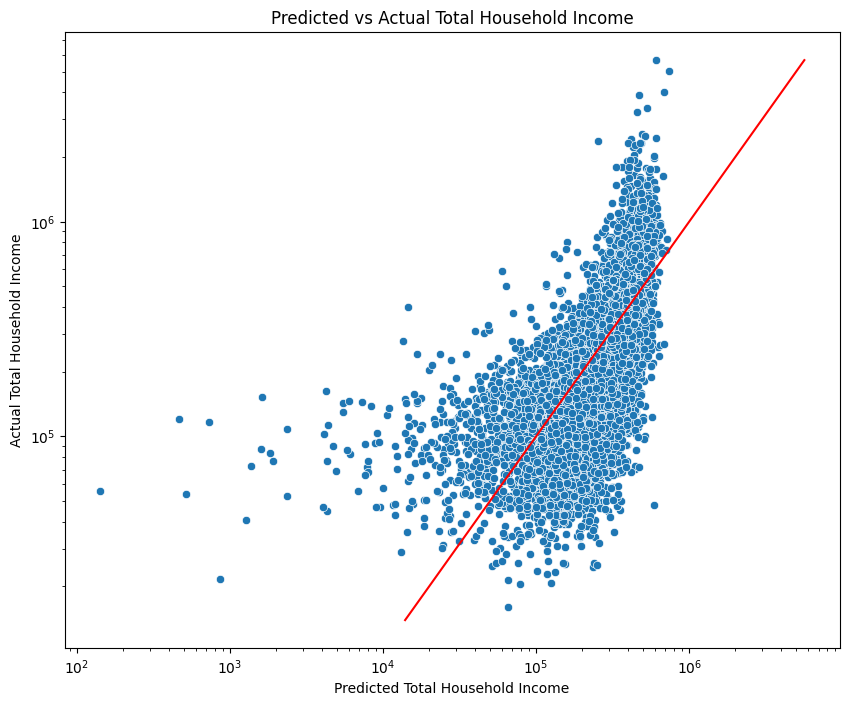

In [15]:
""" y_rfr_predict = rfr.predict(X)
mean_squared_error(y, y_rfr_predict)
plt.figure(figsize=(20,5))
ax = sns.regplot(x=y, y = y_rfr_predict)
ax.set(xlabel='Total Household Income', ylabel='Predicted TIH') """

print("Kích thước của mảng:", pred.shape)
print("Kích thước của mảng:", y_test.shape)

# Plot the predictions (on the x-axis) against the outcome (cty) on the test data
plt.figure(figsize=(10, 8))
sns.scatterplot(x=pred, y=y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Predicted Total Household Income')
plt.ylabel('Actual Total Household Income')
plt.title('Predicted vs Actual Total Household Income')
plt.show()